<a href="https://colab.research.google.com/github/AnnaBo1/python_for_DA/blob/main/hw_4_4_%D0%92%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%8F_%D0%B7_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи pandas.DataFrame. Це дозволяє будувати візуалізації ще швидше.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot` та `pandas`.  Завантажте дані з файла yulu_rental.csv у pandas.DataFrame df.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('yulu_rental.csv')

1.1. Користуючись групою методів `pandas.plot` побудуйте гістограму кількості зареєстрованих користувачів з налаштуваннями за замовченням (тобто без жодних додаткових параметрів).

In [4]:
display(df.head(3))

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


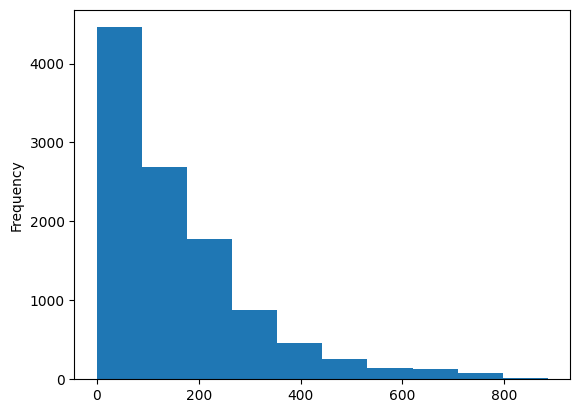

In [3]:
df['registered'].plot.hist()
plt.show()

1.2. Побудуйте гістограму для цього ж показника, але задайте кількість бінів рівну 30 і задайте прозорість 0.5. Додайте підписи за осями ОХ і ОУ, а також назву дівграмі. Опишіть свої спостереження. Що бачите? Чому дані можуть мати такий розподіл?

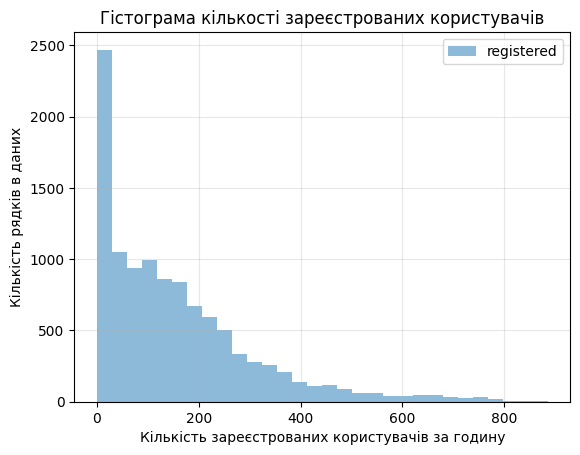

In [10]:
df['registered'].plot.hist(bins=30, alpha=0.5)
plt.title('Гістограма кількості зареєстрованих користувачів')
plt.xlabel('Кількість зареєстрованих користувачів за годину')
plt.ylabel('Кількість рядків в даних')
plt.legend()
plt.grid(axis='both', alpha=.3) #сітка
plt.show()

Має вийти щось таке (може бути без сітки):

![](https://drive.google.com/uc?export=view&id=1Pb3UD8cmg_V0LLf8A4feOepTDXMqEAf8)


На початку спостерігається пік реєстрацій, що може бути пов'язано з проведенями якихось попозицій, реклами або зі зручністю використаня в залежності від сезона та погоди. Стрімкий спад показує на нерегулярне використаня або на не актуальність використання залежно наприклад від погоди або часу або ж відсутності проведеня гарної і регулярної маркетенгової компанії.

--------

Перетворимо колонку `datetime` на тип даних `pd.datetime` - це нам доопоможе в подальшій роботі. Просто запустіть колонку нижче і занатуйте собі цей метод роботи з колонкою, в якій міститься дата і час.

In [11]:
df['datetime'] = pd.to_datetime(df.datetime)

І створимо нову колонку `dayofweek` для того, аби дослідити детальніше, коли у нас немає поїздок.

In [12]:
df['dayofweek'] = df.datetime.dt.day_of_week

Переглянемо значення в колонкці. Колонка dayofweek містить числа від 0 до 6 включно, де 0 відповідає понеділку.

In [13]:
df[['datetime','dayofweek']][df.dayofweek==0].head()

,datetime,dayofweek
47,2011-01-03 00:00:00,0
48,2011-01-03 01:00:00,0
49,2011-01-03 04:00:00,0
50,2011-01-03 05:00:00,0
51,2011-01-03 06:00:00,0


2. Проведемо аналіз нульової активності зареєстрованих користувачів за днями тижня. Для цього
  1. Виберіть з набору даних усі записи, де кількість зареєстрованих користувачів дорівнює 0. Групуйте ці записи за днями тижня (`dayofweek`) та обчисліть кількість нульових записів для кожного дня.
  2. Після групування, використайте графік типу "bar" для візуалізації результатів. Кожна смужка на графіку має відображати кількість записів у даних для цього дня тижня, коли не було зареєстровано жодної поїздки користувачами.

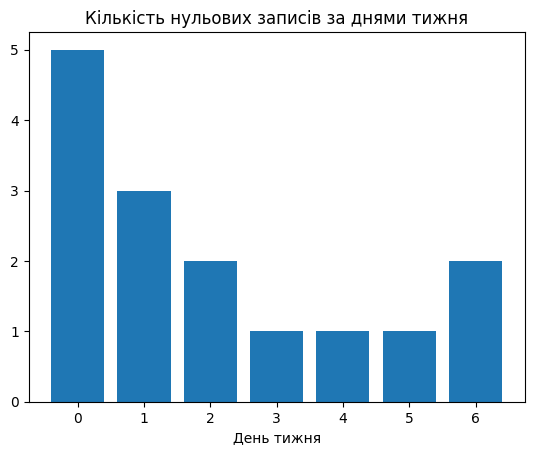

In [20]:
filtered = df[df['registered'] == 0] #Фільтрує дані, залишаючи тільки записи, де кількість зареєстрованих користувачів дорівнює 0.
grouped = filtered.groupby('dayofweek').size() # Групуємо дані за днями тижня та підраховуємо кількість записів для кожного дня
plt.bar(grouped.index, grouped.values) # Побудова графіку
plt.xlabel('День тижня')
plt.title('Кількість нульових записів за днями тижня')
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1FXNzMa7rTdBQDwXSQfPTtPX5CHZK9A4X)

3. Проведемо аналіз загальної кількості зареєстрованих покристувачів за різними погодними умовами.
Згрупуйте всі дані за погодними умовами і визначте суму кількості зареєстрованих користувачів для кожної погодньої умови.
Побудуйте стовпачасту діаграму, які відобразить результат обчислень.
Зверніться до опису даних та дайте відповідь: чи побудована візуалізація має логічний сенс з точки зору опису даних.

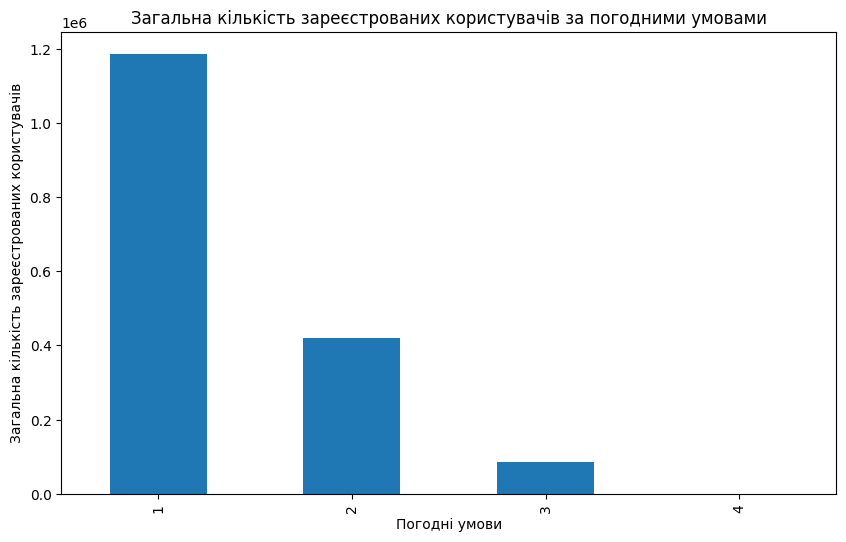

In [27]:
grouped = df.groupby('weather')['registered'].sum()
plt.figure(figsize=(10, 6))
ax = grouped.plot(kind='bar') #.plot(kind='bar') забезпечує, що стовпчикова діаграма відображає правильні значення на осі X.
plt.xlabel('Погодні умови')
plt.ylabel('Загальна кількість зареєстрованих користувачів')
plt.title('Загальна кількість зареєстрованих користувачів за погодними умовами')
plt.show()

З точки зору опису даних побудована візуалізація має логічний сенс, бо наприклад '1' - це хороша погода і якщо погодні умови погіршуються, то можливість користуваня і відповідно попить на використаня продукту зменшується.

4. Користуючись групою методів pandas.plot побудуйте діаграму розсіювання (scatter plot) між вологістю і кількістю зареєстрованих користувачів. Встановіть прозорість на 0.5, а також налаштуйте діаграму так, аби колір кожної точки відповідав значенню температури за відчуттями (`atemp`).

Проаналізуйте графік, що спостерігаєте?

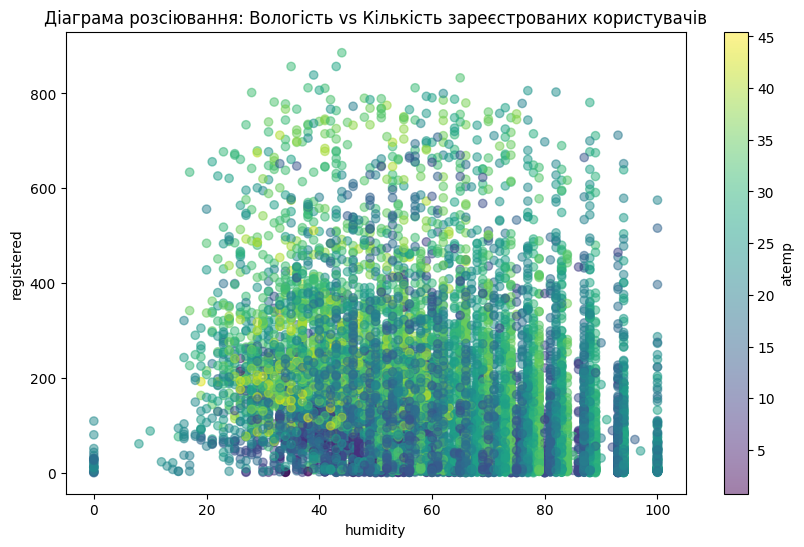

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(
    df['humidity'],
    df['registered'],
    c=df['atemp'],  # Колір точок залежить від значення 'atemp'. "c=" - дає нам різнокольорові точки. без "c=" всі точки будуть одного кольору.
    alpha=0.5,      # Прозорість точок
)
plt.xlabel('humidity')
plt.ylabel('registered')
plt.title('Діаграма розсіювання: Вологість vs Кількість зареєстрованих користувачів')
plt.colorbar(label='atemp') #plt.colorbar():Додає колірну шкалу, яка показує значення температури.
plt.show()

Люди орендують велосипеди незалежно від вологості, хоча може бути деякий спад активності на рівні низької або високої вологості.
Можна помітити певний спад активності при найнижчій вологості (0-10%), де кількість зареєстрованих користувачів є незначною. Це може бути пов'язано з умовами погоди. Наприклад дуже холодні дні, коли користувачі менше схильні використовувати велосипеди.
Значення температури понад 20 гадусів асоціюються з більшою кількістю зареєстрованих користувачів 500-800+. Це підтверджує гіпотезу, що в теплі дні більше людей орендують велосипеди.
Коли низька температура (показана фіолетовими точками), кількість користувачів дуже незначна. Це показує, що люди можуть активно використовувати подукт в період високої вологості але погода та темпеатура на пряму впливають на попит та кількість користувачів.


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1trepX8z23YwyP9P8cAko9IzwOZkvLo8y)